<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"></center><br/>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 60 minutes


# Assignment Scenario

Congratulations! You have just been hired by a US Weather forecast firm as a data scientist.

The company is considering the weather condition to help predict the possibility of precipitations, which involves using various local climatological variables, including temperature, wind speed, humidity, dew point, and pressure. The data you will be handling was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

Your task is to provide a high level analysis of weather data in JFK Airport. Your stakeholders want to understand the current and historical record of precipitations based on different variables. For now they are mainly interested in a macro-view of JFK Airport Weather, and how it relates to the possibility to rain because it will affect flight delays and etc.


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork926-2022-01-01). 

For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features. In this project, you will practice reading data files, preprocessing data, creating models, improving models and evaluating them to ultimately choose the best model.




## Table of Contents:

Using this R notebook you will complete **10 tasks**:
* [0. Import Modules](#cell0)
* [1. Download and Unzip NOAA Weather Dataset](#cell1)
* [2. Read Dataset into Project](#cell2)
* [3. Select Subset of Columns](#cell3)
* [4. Clean Up Columns](#cell4)
* [5. Convert Columns to Numerical Types](#cell5)
* [6. Rename Columns](#cell6)
* [7. Exploratory Data Analysis](#cell7)
* [8. Linear Regression](#cell8)
* [9. Improve the Model](#cell9)
* [10. Find Best Model](#cell10)


<a id="cell0"></a>
## 0. Import required modules

Below, install "tidymodels", additionally "rlang" should be updated in order to properly run "tidymodels". 


In [1]:
# Install tidymodels if you haven't done so
install.packages("rlang")
install.packages("tidymodels")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘cachem’, ‘tzdb’, ‘timechange’, ‘warp’, ‘stringi’, ‘memoise’, ‘vctrs’, ‘lifecycle’, ‘pillar’, ‘tidyselect’, ‘scales’, ‘withr’, ‘glue’, ‘patchwork’, ‘generics’, ‘clock’, ‘ipred’, ‘lubridate’, ‘slider’, ‘purrr’, ‘stringr’, ‘cpp11’, ‘modelenv’, ‘broom’, ‘cli’, ‘conflicted’, ‘dials’, ‘dplyr’, ‘ggplot2’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘rstudioapi’, ‘tibble’, ‘tidyr’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


**Note: After installing the packages, restart the kernel. Without installing the packages again, load them. Tidyverse and Tidymodels will be the two main packages you will use.**


In [1]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

library(zoo)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──
✔ broom        1.0.3     ✔ recipes      1.0.5
✔ dials        1.1.0     ✔ rsample      1.1.1
✔ dplyr        1.1.0     ✔ tibble       3.1.8
✔ ggplot2      3.4.1     ✔ tidyr        1.3.0
✔ infer        1.0.4     ✔ tune         1.0.1
✔ modeldata    1.1.0     ✔ workflows    1.1.3
✔ parsnip      1.0.4     ✔ workflowsets 1.0.0
✔ purrr        1.0.1     ✔ yardstick    1.1.0
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ stringr 1.5.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_fa


### Understand the Dataset

The original NOAA JFK dataset contains 114,546 hourly observations of various local climatological variables (including temperature, wind speed, humidity, dew point, and pressure). 

In this project you will use a sample dataset, which is around 293 KB. [Link to the sample dataset](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz).

The sample contains 5727 rows (about 5% or original rows) and 9 columns, which are:
- DATE
- HOURLYDewPointTempF
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYWETBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYSeaLevelPressure
- HOURLYStationPressure

The original dataset is much bigger. Feel free to explore the original dataset. [Link to the original dataset.](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa_weather.html) 

For more information about the dataset, checkout the [preview](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/data-preview/index.html?_ga=2.176781478.281508226.1616293518-1509963377.1616117067&cm_mc_uid=90945889198916153255549&cm_mc_sid_50200000=64650651616293516933) of NOAA Weather - JFK Airport.


<a id="cell1"></a>

## 1. Download NOAA Weather Dataset

Use the `download.file()` function to download the sample dataset from the URL below.

URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'


In [2]:
URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'
download.file(URL, destfile = "noaa-weather-sample-data.tar.gz")

Untar the zipped file.


In [5]:
untar("noaa-weather-sample-data.tar.gz" , tar = "internal")

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”

<a id="cell2"></a>
## 2. Extract and Read into Project
We start by reading in the raw dataset. You should specify the file name as "noaa-weather-sample-data/jfk_weather_sample.csv".


In [2]:
NOAA_weather <- read_csv( "noaa-weather-sample-data/jfk_weather_sample.csv")

Parsed with column specification:
cols(
  DATE = col_datetime(format = ""),
  HOURLYDewPointTempF = col_double(),
  HOURLYRelativeHumidity = col_double(),
  HOURLYDRYBULBTEMPF = col_double(),
  HOURLYWETBULBTEMPF = col_double(),
  HOURLYPrecip = col_character(),
  HOURLYWindSpeed = col_double(),
  HOURLYSeaLevelPressure = col_double(),
  HOURLYStationPressure = col_double()
)
Warning message:
“1 parsing failure.
 row                 col               expected actual                                              file
1443 HOURLYDewPointTempF no trailing characters      s 'noaa-weather-sample-data/jfk_weather_sample.csv'
”

Next, display the first few rows of the dataframe.


In [3]:
head(NOAA_weather)

DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015-07-25 13:51:00,60,46,83,68,0.00,13,30.01,29.99
2016-11-18 23:51:00,34,48,53,44,0.00,6,30.05,30.03
2013-01-06 08:51:00,33,89,36,35,0.00,13,30.14,30.12
2011-01-27 16:51:00,18,48,36,30,0.00,14,29.82,29.80
2015-01-03 12:16:00,27,61,39,34,T,11,NA,30.50
2013-02-15 20:51:00,35,79,41,38,0.00,6,29.94,29.92


Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [4]:
glimpse(NOAA_weather)

Rows: 5,727
Columns: 9
$ DATE                   <dttm> 2015-07-25 13:51:00, 2016-11-18 23:51:00, 2013…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19, …
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "0…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, 3…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


<a id="cell3"></a>
## 3. Select Subset of Columns

The end goal of this project will be to predict `HOURLYprecip` (precipitation) using a few other variables. Before you can do this, you first need to preprocess the dataset. Section 3 to section 6 focuses on preprocessing.

The first step in preprocessing is to select a subset of data columns and inspect the column types.

The key columns that we will explore in this project are:
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYStationPressure

Data Glossary:
- 'HOURLYRelativeHumidity' is the relative humidity given to the nearest whole percentage.
- 'HOURLYDRYBULBTEMPF' is the dry-bulb temperature and is commonly used as the standard air temperature reported. It is given here in whole degrees Fahrenheit.
- 'HOURLYPrecip' is the amount of precipitation in inches to hundredths over the past hour. For certain automated stations, precipitation will be reported at sub-hourly intervals (e.g. every 15 or 20 minutes) as an accumulated amount of all precipitation within the preceding hour. A “T” indicates a trace amount of precipitation.
- 'HOURLYWindSpeed' is the speed of the wind at the time of observation given in miles per hour (mph).
- 'HOURLYStationPressure' is the atmospheric pressure observed at the station during the time of observation. Given in inches of Mercury (in Hg).

`Select` those five columns and store the modified dataframe as a new variable.


In [5]:
Weather_subset <- NOAA_weather %>%
                select(HOURLYRelativeHumidity, HOURLYDRYBULBTEMPF,
                       HOURLYPrecip, HOURLYWindSpeed, HOURLYStationPressure)

Show the first 10 rows of this new dataframe.


In [6]:
head(Weather_subset, n=10)

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,T,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


<a id="cell4"></a>
## 4. Clean Up Columns

From the dataframe preview above, we can see that the column `HOURLYPrecip` - which is the hourly measure of precipitation levels - contains both `NA` and `T` values. `T` specifies *trace amounts of precipitation* (meaning essentially no precipitation), while `NA` means *not available*, and is used to denote missing values. Additionally, some values also have "s" at the end of them, indicating that the precipitation was snow. 

Inspect the unique values present in the column `HOURLYPrecip` (with `unique(dataframe$column)`) to see these values.


In [7]:
 unique(Weather_subset$HOURLYPrecip)

[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

Having characters in values (like the "T" and "s" that you see in the unique values) will cause problems when you create a model because values for precipitation should be numerical. So you need to fix these values that have characters. 

Now, for the column `HOURLYPrecip`:
1. Replace all the `T` values with "0.0" and 
2. Remove "s" from values like "0.02s". In R, you can use the method `str_remove(column, pattern = "s$")` to remove the character "s" from the end of values. The "$" tells R to match to the end of values. The `pattern` is a regex pattern. Look at [here](https://www.rdocumentation.org/packages/stringi/versions/1.5.3/topics/about_search_regex?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork926-2022-01-01) for more information about regex and matching to strings in R.

Remember that you can use `tidyverse`'s  `mutate()` to update columns.

You can check your work by checking if unique values of `HOURLYPrecip` still contain any `T` or `s`. Store the modified dataframe as a new variable.


In [8]:
Weather_Modsupset <- Weather_subset %>%
                          mutate(HOURLYPrecip = str_replace(HOURLYPrecip, 'T', '0.0'),
                                 HOURLYPrecip = str_remove_all(HOURLYPrecip, pattern = "s$"))
                        
unique(Weather_Modsupset$HOURLYPrecip)

[1] "0.00" "0.0"  "0.06" NA     "0.03" "0.02" "0.08" "0.01" "0.07" "0.16"
[11] "0.09" "0.22" "0.24" "0.18" "0.05" "0.04" "0.11" "0.14" "0.25" "0.10"
[21] "0.58" "0.12" "0.13" "0.46" "1.07" "1.19" "0.34" "0.20" "0.36" "0.42"
[31] "0.17" "0.27" "0.35" "0.31" "0.33" "0.23" "0.26" "0.28" "0.75" "0.19"
[41] "0.54" "0.59" "0.21"

<a id="cell5"></a>
## 5. Convert Columns to Numerical Types
Now that you have removed the characters in the `HOURLYPrecip` column, you can safely covert the column to a numeric type.

First, check the types of the columns. You will notice that all are `dbl` (double or numeric) except for `HOURLYPrecip`, which is `chr` (character or string). Use the `glimpse` function from Tidyverse.


In [9]:
glimpse(Weather_Modsupset)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "0.0", "0.00", …
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


Convert `HOURLYPrecip` to the `numeric` type and store the cleaned dataframe as a new variable.


In [10]:
Weather_Modsupset$HOURLYPrecip <- as.numeric(Weather_Modsupset$HOURLYPrecip)

We can now see that all fields have numerical data type.


In [11]:
glimpse(Weather_Modsupset)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


<a id="cell6"></a>
## 6. Rename Columns
Let's rename the following columns as:
- 'HOURLYRelativeHumidity' to 'relative_humidity'
- 'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
- 'HOURLYPrecip' to 'precip'
- 'HOURLYWindSpeed' to 'wind_speed'
- 'HOURLYStationPressure' to 'station_pressure'

You can use `dplyr::rename()`. Then, store the final dataframe as a new variable.


In [12]:
Weather_Findata <- Weather_Modsupset %>%
                   rename(relative_humidity = HOURLYRelativeHumidity,
                          dry_bulb_temp_f = HOURLYDRYBULBTEMPF,
                          precip = HOURLYPrecip,
                          wind_speed = HOURLYWindSpeed,
                          station_pressure = HOURLYStationPressure) 

<a id="cell7"></a>
## 7. Exploratory Data Analysis
Now that you have finished preprocessing the dataset, you can can start exploring the columns more.

First, split the data into a training and testing set. Splitting a dataset is done randomly, so to have reproducible results set the seed = 1234. Also, use 80% of the data for training.


In [13]:
# First replacing missing values with 0 so that they don't affect the models
Weather_Findata <- Weather_Findata %>%
                    replace_na(list(relative_humidity = 0,
                                    dry_bulb_temp_f = 0,
                                    precip = 0,
                                    station_pressure = 0,
                                    wind_speed = 0))

# Splitting the data into a training and testing set
set.seed(1234)
weather_split <- initial_split(Weather_Findata, prop = 0.8)
train_data <- training(weather_split)
test_data <- testing(weather_split)

Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


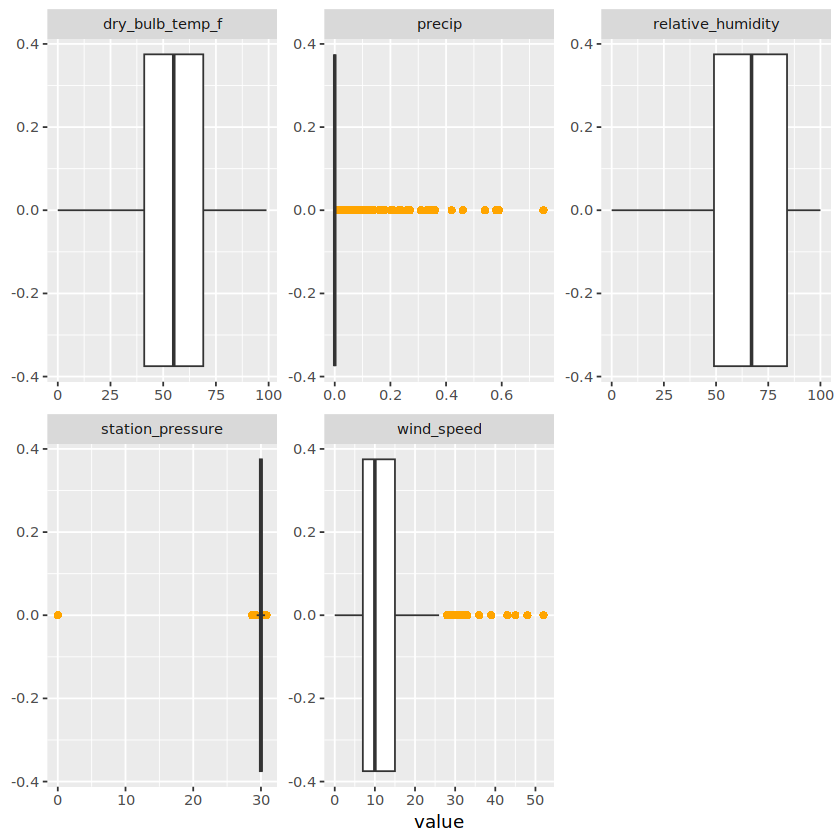

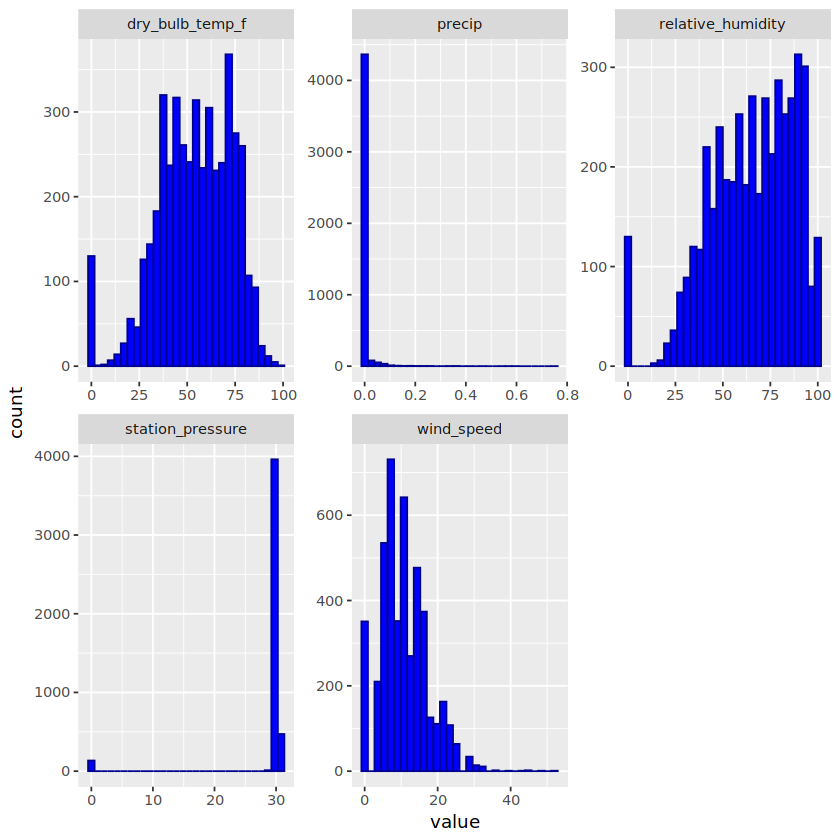

In [16]:
# I will plot the training set with both histograms and box plots

# transforming the training data into long, so I can plot the variables in one figure using facet_wrap() 
train_data_long <- train_data %>%                      
  pivot_longer(colnames(train_data)) %>% 
  as.data.frame()

# Draw each column as box plot
ggplot(train_data_long, aes(x = value)) +    
  geom_boxplot(outlier.colour="orange", outlier.shape=16,
               outlier.size=2, notch=FALSE)+
  facet_wrap(~ name, scales = "free")

# Draw each column as histogram
ggplot(train_data_long, aes(x = value)) +    
  geom_histogram(bins=30, color = "dark blue", fill = "blue") + 
  facet_wrap(~ name, scales = "free")

<a id="cell8"></a>
## 8. Linear Regression 
After exploring the dataset more, you are now ready to start creating models to predict the precipitation (`precip`).

Create simple linear regression models where `precip` is the response variable and each of `relative_humidity`, `dry_bulb_temp_f`,`wind_speed` or `station_pressure` will be a predictor variable, e.g. `precip ~ relative_humidity`, `precip ~ dry_bulb_temp_f`, etc. for a total of four simple models. 
Additionally, visualize each simple model with a scatter plot.



Call:
lm(formula = precip ~ relative_humidity, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01135 -0.00748 -0.00382  0.00005  0.73987 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -9.007e-03  1.301e-03  -6.921  5.1e-12 ***
relative_humidity  2.035e-04  1.889e-05  10.773  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02904 on 4579 degrees of freedom
Multiple R-squared:  0.02472,	Adjusted R-squared:  0.02451 
F-statistic: 116.1 on 1 and 4579 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'

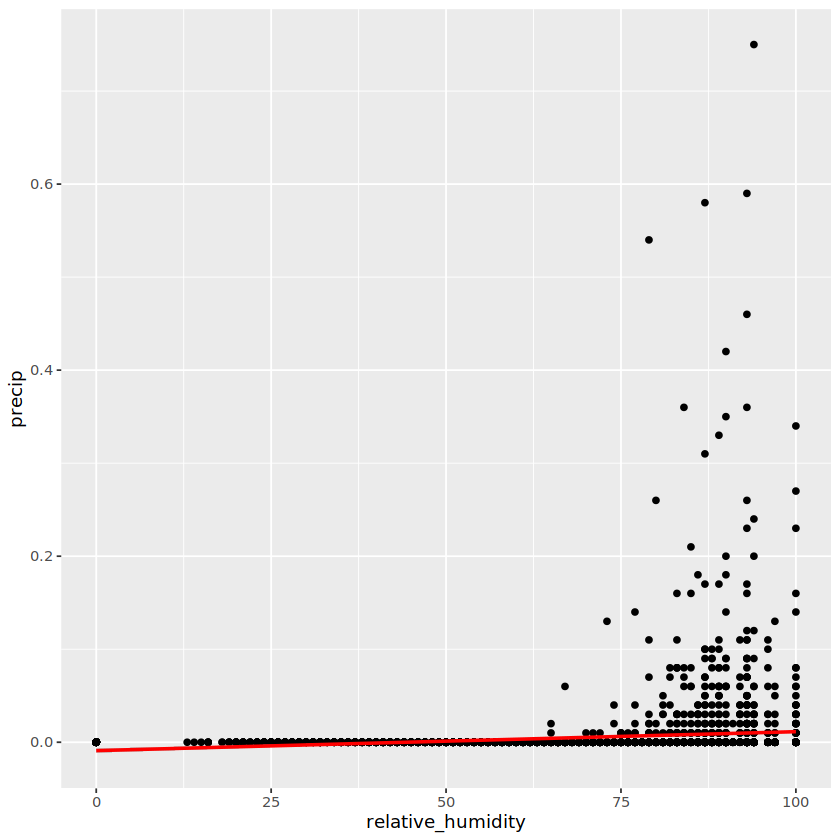

In [17]:
#simple linear regression model for the relation "precip ~ relative_humidity"
Model_humidity <- lm(precip ~ relative_humidity, data = train_data)

#get coefficients of the model 
summary(Model_humidity) 

# The modle is: precip = -9.007e-03 + 2.035e-04 relative_humidity

# Visualizing the model
ggplot(train_data, aes(x = relative_humidity, y = precip)) +
  geom_point() + 
  stat_smooth(method = "lm", col = "red")



Call:
lm(formula = precip ~ dry_bulb_temp_f, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00542 -0.00463 -0.00421 -0.00381  0.74529 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)     2.811e-03  1.292e-03   2.175   0.0297 *
dry_bulb_temp_f 2.634e-05  2.261e-05   1.165   0.2441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0294 on 4579 degrees of freedom
Multiple R-squared:  0.0002963,	Adjusted R-squared:  7.794e-05 
F-statistic: 1.357 on 1 and 4579 DF,  p-value: 0.2441


`geom_smooth()` using formula = 'y ~ x'

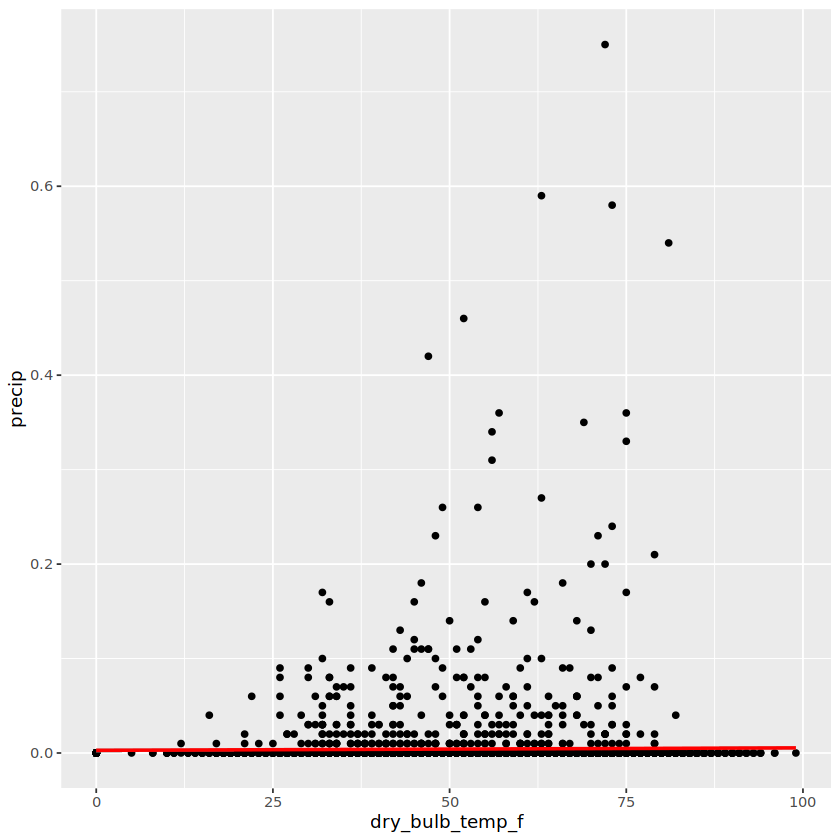

In [18]:
#simple linear regression model for the relation "precip ~ relative_humidity"
Model_dryTemp <- lm (precip ~ dry_bulb_temp_f, data = train_data)

#get coefficients of the model 
summary(Model_dryTemp) 

# The modle is: precip = 2.811e-03 + 2.634e-05 dry_bulb_temp_f

# Visualizing the model
ggplot(train_data, aes(x = dry_bulb_temp_f, y = precip)) +
  geom_point() + 
  stat_smooth(method = "lm", col = "red")



Call:
lm(formula = precip ~ station_pressure, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00440 -0.00433 -0.00431 -0.00430  0.74571 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)
(Intercept)      1.383e-03  2.528e-03   0.547    0.584
station_pressure 9.775e-05  8.556e-05   1.143    0.253

Residual standard error: 0.02941 on 4579 degrees of freedom
Multiple R-squared:  0.000285,	Adjusted R-squared:  6.666e-05 
F-statistic: 1.305 on 1 and 4579 DF,  p-value: 0.2533


`geom_smooth()` using formula = 'y ~ x'

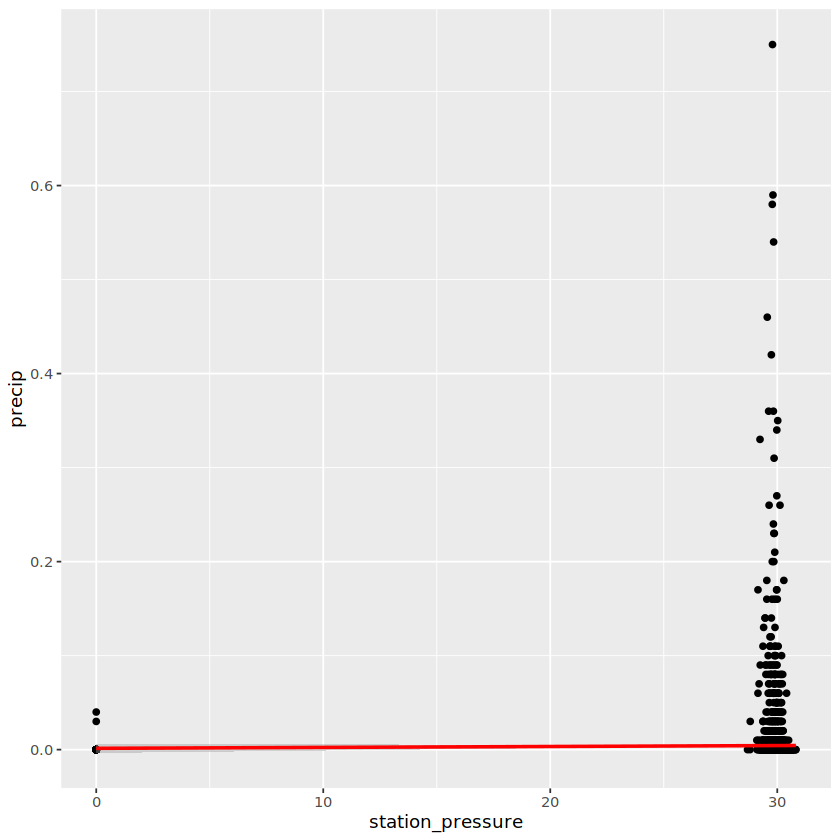

In [19]:
#simple linear regression model for the relation "precip ~ relative_humidity"
Model_press <- lm(precip ~ station_pressure, data = train_data)

#get coefficients of the model 
summary(Model_press) 

# The modle is: precip = 1.383e-03  + 9.775e-05 station_pressure

# Visualizing the model
ggplot(train_data, aes(x = station_pressure, y = precip)) +
  geom_point() + 
  stat_smooth(method = "lm", col = "red")



Call:
lm(formula = precip ~ wind_speed, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01583 -0.00511 -0.00370 -0.00286  0.74742 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.168e-03  8.452e-04   1.381    0.167    
wind_speed  2.819e-04  6.681e-05   4.219  2.5e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02935 on 4579 degrees of freedom
Multiple R-squared:  0.003872,	Adjusted R-squared:  0.003654 
F-statistic:  17.8 on 1 and 4579 DF,  p-value: 2.504e-05


`geom_smooth()` using formula = 'y ~ x'

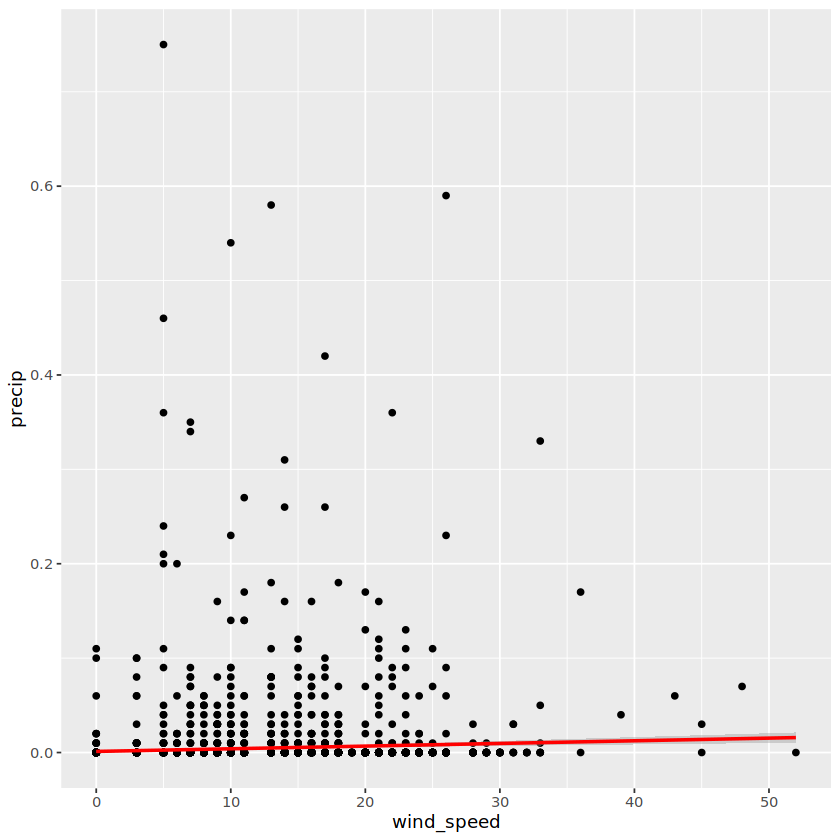

In [20]:
#simple linear regression model for the relation "precip ~ relative_humidity"
Model_wind <- lm(precip ~ wind_speed, data = train_data)

#get coefficients of the model 
summary(Model_wind) 

# The modle is: precip = 0.0014408 + 0.0002915 wind_speed

# Visualizing the model
ggplot(train_data, aes(x = wind_speed, y = precip)) +
  geom_point() + 
  stat_smooth(method = "lm", col = "red")


<a id="cell9"></a>
## 9. Improve the Model
Now, try improving the simple models you created in the previous section. 

Create at least two more models, each model should use at least one of the different techniques:
1. Add more features/predictors
2. Add regularization (L1, L2 or a mix)
3. Add a polynomial component

Also, for each of the models you create, check the model performance using the **training set** and a metric like MSE, RMSE, or R-squared.

Consider using `tidymodels` if you choose to add regularization and tune lambda.


In [40]:
# First Model: adding more features to check Multilinear regression model
#for the relation "precip ~ relative_humidity + dry_bulb_temp_f + station_pressure + wind_speed"

# Pick linear regression
lm_spec <- linear_reg() %>%
  # Set engine
  set_engine(engine = "lm")

# Fit the model
Multilinear_Model_Fit <- lm_spec %>% 
    fit(precip ~  relative_humidity + dry_bulb_temp_f + station_pressure + wind_speed, data = train_data)

#get coefficients of the model 
Multilinear_Model_Fit 

#check the model performance using the training set 
Multilinear_train_results <- Multilinear_Model_Fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = train_data) %>%
  # Create a new column to save the true values
  mutate(truth = train_data$precip)

head(Multilinear_train_results)

# Assessing the modl using RMSE and R-squared metrics
Multilinear_train_RMSE <- rmse(Multilinear_train_results, truth = truth,  #  RMSE: 0.02883251
     estimate = .pred)

Multilinear_train_Rsquared <- rsq(Multilinear_train_results, truth = truth,   #  R-squared: 0.03841775
    estimate = .pred)



parsnip model object


Call:
stats::lm(formula = precip ~ relative_humidity + dry_bulb_temp_f + 
    station_pressure + wind_speed, data = data)

Coefficients:
      (Intercept)  relative_humidity    dry_bulb_temp_f   station_pressure  
       -6.709e-04          2.780e-04         -1.945e-06         -6.257e-04  
       wind_speed  
        4.730e-04  


.pred,truth
<dbl>,<dbl>
0.006944388,0
-0.008153845,0
0.007899284,0
0.005431160,0
-0.002424792,0
0.003419222,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.02883251


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.03841775


parsnip model object


Call:
stats::lm(formula = precip ~ poly(wind_speed, 8, raw = TRUE), 
    data = data)

Coefficients:
                     (Intercept)  poly(wind_speed, 8, raw = TRUE)1  
                       9.241e-04                         2.985e-03  
poly(wind_speed, 8, raw = TRUE)2  poly(wind_speed, 8, raw = TRUE)3  
                      -7.357e-04                         6.792e-05  
poly(wind_speed, 8, raw = TRUE)4  poly(wind_speed, 8, raw = TRUE)5  
                      -2.199e-06                        -2.847e-08  
poly(wind_speed, 8, raw = TRUE)6  poly(wind_speed, 8, raw = TRUE)7  
                       3.486e-09                        -7.595e-11  
poly(wind_speed, 8, raw = TRUE)8  
                       5.305e-13  


.pred,truth
<dbl>,<dbl>
0.040880450,0
0.003317345,0
0.006405939,0
0.004090834,0
0.003317345,0
0.004532308,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.02928137


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.008244839


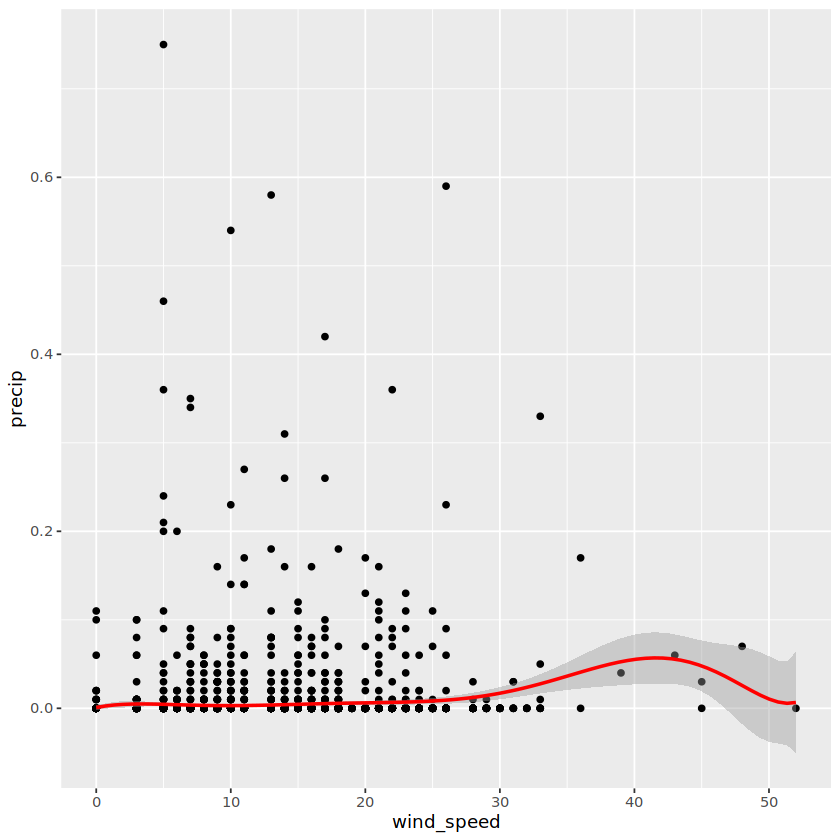

In [39]:
#Secon model: add  a polynomial component

# Get the model using lm()
Polynomial_Model_Fit <- lm_spec %>% 
    fit(precip ~ poly(wind_speed, 8, raw = TRUE ) , data = train_data)

#get coefficients of the model 
Polynomial_Model_Fit 

# Visualizing the model
ggplot(train_data, aes(x = wind_speed, y = precip)) +
  geom_point() + 
  stat_smooth(method = "lm", formula = y ~ poly(x, 8), col = "red")

#check the model performance using the training set 
Polynomial_train_results <- Polynomial_Model_Fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = train_data) %>%
  # Create a new column to save the true values
  mutate(truth = train_data$precip)

head(Polynomial_train_results)

# Assessing the modl using RMSE and R-squared metrics
Polynomial_train_RMSE <- rmse(Polynomial_train_results, truth = truth,  #  RMSE: 0.02928137
     estimate = .pred)

Polynomial_train_Rsquared <- rsq(Polynomial_train_results, truth = truth,   #  R-squared: 0.008244839
    estimate = .pred)



In [41]:
# Third model: Add Ridge regularization L2

#create a recipe() that includes the model formula
Weather_recipe <-
  recipe(precip ~ ., data = train_data)

# tuning a ridge model
tune_spec <- linear_reg(penalty = tune(), mixture = 0) %>%
  set_engine("glmnet")

#create a workflow object 
ridge_wf <- workflow() %>%
  add_recipe(Weather_recipe)

#define cross validation to resample the data
Weather_cvfolds <- vfold_cv(train_data)

#set up the grid
lambda_grid <- grid_regular(levels = 50,
  penalty(range = c(-3, 0.3)))

#tune the grid
ridge_grid <- tune_grid(
    ridge_wf %>% add_model(tune_spec), 
    resamples = Weather_cvfolds, 
    grid = lambda_grid)

show_best(ridge_grid, metric = "rmse")
# From the table and using RMSE as the metric, using lambda (penalty) equal to 0.00346 gives the best result. 

#specify the model
ridge_spec <- linear_reg(penalty = 0.00346, mixture = 0) %>%
  set_engine("glmnet")

#add the ridge model and fit the model.
ridge_fit <- ridge_wf %>%
  add_model(ridge_spec) %>%
  fit(data = train_data)

#view the result of the fitted ridge regression model
ridge_fit %>%
  pull_workflow_fit() %>%
  tidy()

#check the model performance using the training set 
Ridge_train_results <- ridge_fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = train_data) %>%
  # Create a new column to save the true values
  mutate(truth = train_data$precip)

head(Ridge_train_results)

# Assessing the modl using RMSE and R-squared metrics
Ridge_train_RMSE <- rmse(Ridge_train_results, truth = truth,  #  RMSE: 0.02885128
     estimate = .pred)

Ridge_train_Rsquared <- rsq(Ridge_train_results, truth = truth,   #  R-squared: 0.0381994
    estimate = .pred)



penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<fct>
0.002171374,rmse,standard,0.02745265,10,0.002976623,Preprocessor1_Model06
0.002535605,rmse,standard,0.02745276,10,0.002979070,Preprocessor1_Model07
0.001859464,rmse,standard,0.02745289,10,0.002974377,Preprocessor1_Model05
0.002960933,rmse,standard,0.02745338,10,0.002981715,Preprocessor1_Model08
0.001592358,rmse,standard,0.02745339,10,0.002972340,Preprocessor1_Model04


term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),-1.794659e-03,0.00346
relative_humidity,2.309136e-04,0.00346
dry_bulb_temp_f,-6.227165e-06,0.00346
wind_speed,3.801783e-04,0.00346
station_pressure,-4.392262e-04,0.00346


.pred,truth
<dbl>,<dbl>
0.006395739,0
-0.005912245,0
0.007254007,0
0.005254620,0
-0.001305528,0
0.003694981,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.02885128


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.0381994


<a id="cell10"></a>
## 10. Find Best Model
Compare the regression metrics of each model from section 9 to find the best model overall. To do this, 

1. Evaluate the models on the **testing set** using at least one metric (like MSE, RMSE or R-squared).
2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
```
model_names <- c("model_1", "model_2", "model_3")
train_error <- c("model_1_value", "model_2_value", "model_3_value")
test_error <- c("model_1_value", "model_2_value", "model_3_value")
comparison_df <- data.frame(model_names, train_error, test_error)
```
3. Finally, from the comparison table you create, conclude which model performed the best.


In [46]:
#check the model performance using the testing set with Multilinear model
Multilinear_test_results <- Multilinear_Model_Fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data) %>%
  # Create a new column to save the true values
  mutate(truth = test_data$precip)


# Assessing the modl using RMSE and R-squared metrics
Multilinear_test_RMSE <- rmse(Multilinear_test_results, truth = truth,  #  RMSE: 0.05160823
     estimate = .pred)

Multilinear_test_Rsquared <- rsq(Multilinear_test_results, truth = truth,   #  R-squared: 0.04195871
    estimate = .pred)


###########################

#check the model performance using the testing set with Polynomial model
Polynomial_test_results <- Polynomial_Model_Fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data) %>%
  # Create a new column to save the true values
  mutate(truth = test_data$precip)


# Assessing the modl using RMSE and R-squared metrics
Polynomial_test_RMSE <- rmse(Polynomial_test_results, truth = truth,  #  RMSE: 0.05238208
     estimate = .pred)

Polynomial_test_Rsquared <- rsq(Polynomial_test_results, truth = truth,   #  R-squared: 0.00382299
    estimate = .pred)


###########################

#check the model performance using the testing set with Redige model
Ridge_test_results <- ridge_fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data) %>%
  # Create a new column to save the true values
  mutate(truth = test_data$precip)


# Assessing the modl using RMSE and R-squared metrics
Ridge_test_RMSE <- rmse(Ridge_test_results, truth = truth,  #  RMSE: 0.05171666
     estimate = .pred)

Ridge_test_Rsquared <- rsq(Ridge_test_results, truth = truth,   #  R-squared: 0.04163393
    estimate = .pred)

# Create a table to easily compare between models using RMSE metric
model_names <- c("Multilinear", "Polynomial", "Ridge (L2)")
train_error <- c(Multilinear_train_RMSE$.estimate, Polynomial_train_RMSE$.estimate, Ridge_train_RMSE$.estimate)
test_error <- c(Multilinear_test_RMSE$.estimate, Polynomial_test_RMSE$.estimate, Ridge_test_RMSE$.estimate)
comparison_df <- data.frame(model_names, train_error, test_error)

comparison_df

model_names,train_error,test_error
<fct>,<dbl>,<dbl>
Multilinear,0.02883251,0.05160823
Polynomial,0.02928137,0.05238208
Ridge (L2),0.02885128,0.05171666


## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
